<a href="https://colab.research.google.com/github/SurrajKumar2000/Diabetes-Prediction-System-/blob/main/Diabetes_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING ESSENTIAL LIBRARIES**

In [631]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [632]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [633]:
path ="gdrive/MyDrive/Colab Notebooks/diabetes.csv" 
data = pd.read_csv(path)

In [634]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [635]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# **CHECKING FOR MISSING VALUES**

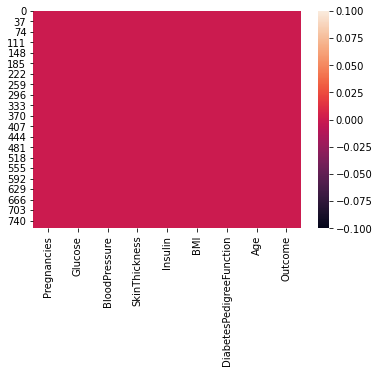

In [636]:
sns.heatmap(data.isnull())

In [637]:
data.shape

(768, 9)

In [638]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **CO-RELATION MATRIX**

In [639]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


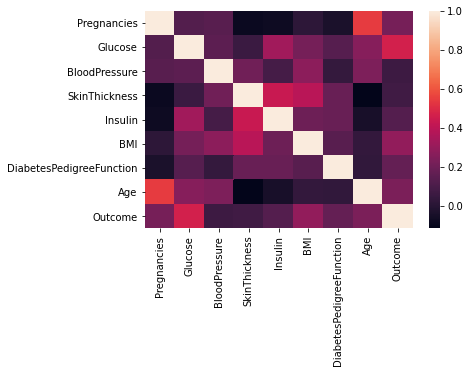

In [640]:
sns.heatmap(correlation)

# **SPLITTING OF TRAIN & TEST DATASET** 

In [641]:
X=data.drop("Outcome",axis=1)
Y=data["Outcome"]
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
547,4,131,68,21,166,33.1,0.160,28
623,0,94,70,27,115,43.5,0.347,21
503,7,94,64,25,79,33.3,0.738,41
26,7,147,76,0,0,39.4,0.257,43
698,4,127,88,11,155,34.5,0.598,28
...,...,...,...,...,...,...,...,...
551,3,84,68,30,106,31.9,0.591,25
767,1,93,70,31,0,30.4,0.315,23
461,1,71,62,0,0,21.8,0.416,26
190,3,111,62,0,0,22.6,0.142,21


# **LOGISTIC REGRESSION MODEL**

In [642]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [643]:
predictions =model.predict(X_test)
print(predictions)

[0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0]


ACCURACY

In [644]:
accuracy = accuracy_score(predictions, Y_test)
print(accuracy)

0.7792207792207793
